<html>
<font color = green size = 5>
<b> Exploratory Data Analysis - Data PreProcessing
</b>
</font>
</html>

<html>
<font color = blue size = 2>
author: Sulekha Aloorravi
</font>
</html>


In [72]:
#Import Libraries
import pandas as pd
import numpy as np

%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt 

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

We are going to load **Melbourne Housing Data Set** to perform a detailed Data preprocessing exercise.

Default NA values that are handled by pandas are as follows:

‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’.

Additionally, we have "inf","missing" in the dataset, which needs to be handled while loading the data.

In [73]:
Missing_Values = ["inf","missing"]

### Load dataset

In [74]:
df = pd.read_csv("Melbourne_housing_FULL.csv",low_memory=False,keep_default_na = True, na_values = Missing_Values)

In [75]:
df.head(5)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225.0,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82.0,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,NaN,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122.0,2003.0,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,2211.0,Parkade,NaN


In [76]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom          float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Latitude         float64
Longtitude       float64
Regionname        object
Propertycount    float64
ParkingArea       object
Price            float64
dtype: object

### Modify variables into their correct datatypes

In [77]:
df['Date'] = pd.to_datetime(df['Date'])
df['Postcode'] = df['Postcode'].astype(object)
df['YearBuilt'] = df['YearBuilt'].astype(object)
df['Latitude'] = df['Latitude'].astype(object)
df['Longtitude'] = df['Longtitude'].astype(object)
df['Propertycount'] = df['Propertycount'].astype(int, errors = 'ignore')

In [78]:
df.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                 object
Bedroom                 float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt                object
CouncilArea              object
Latitude                 object
Longtitude               object
Regionname               object
Propertycount           float64
ParkingArea              object
Price                   float64
dtype: object

### Glance summary statistics

In [79]:
df.describe()

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,Propertycount,Price
count,34857.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,34854.000000,2.724700e+04
mean,3.031012,11.184929,3.084647,1.624798,1.728845,593.598993,160.25640,7572.888306,1.050173e+06
std,0.969933,6.788892,0.980690,0.724212,1.010771,3398.841946,401.26706,4428.090313,6.414671e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,83.000000,8.500000e+04
25%,2.000000,6.400000,2.000000,1.000000,1.000000,224.000000,102.00000,4385.000000,6.350000e+05
50%,3.000000,10.300000,3.000000,2.000000,2.000000,521.000000,136.00000,6763.000000,8.700000e+05
75%,4.000000,14.000000,4.000000,2.000000,2.000000,670.000000,188.00000,10412.000000,1.295000e+06
max,16.000000,48.100000,30.000000,12.000000,26.000000,433014.000000,44515.00000,21650.000000,1.120000e+07


<html>
<font color = Blue size = 4>
<b> Missing Values Treatment
</b>
</font>
</html>

Let us have a look at the missing data first.

In [80]:
missing_values=df.columns[df.isnull().any()]
df[missing_values].isnull().sum()

Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longtitude        7976
Propertycount        3
Price             7610
dtype: int64

In [81]:
df[df.isnull().any(axis=1)][missing_values].head()

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price
0,2.5,3067,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.996,4019.0,NaN
3,3.3,3206,2.0,1.0,0.0,159.0,NaN,NaN,Port Phillip City Council,-37.845,144.954,3280.0,1455000.0
4,6.4,3078,3.0,2.0,1.0,174.0,122.0,2003,Darebin City Council,-37.7818,145.02,2211.0,NaN
6,6.4,3078,3.0,2.0,2.0,208.0,NaN,2013,Darebin City Council,-37.7854,145.032,2211.0,1110000.0
8,11.1,3025,3.0,1.0,1.0,620.0,108.0,1950,Hobsons Bay City Council,-37.829,144.848,5132.0,NaN


Missing data might mislead our analysis. To avoid issues in analysing the data, we might need to impute it using one of the below methods.

### Method1: Delete

We can simply delete the missing values if the count of missing records is insignificant compared to the total number of records. Eg: only 2% of the records have missing values in a large dataset. 

In [82]:
df[df["Distance"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price
12355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,616000.0


In [83]:
df.dropna(subset= ['Distance'], inplace = True)

In [84]:
df[df["Distance"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price


### Method 2: Replace with summary statistics

#### Replace with median

In [85]:
df[df["Bedroom"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price
11,11.1,3025,NaN,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,5132.0,857500.0
17,11.0,3147,NaN,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,3052.0,1820000.0
20,10.5,3034,NaN,NaN,NaN,NaN,NaN,NaN,Moonee Valley City Council,NaN,NaN,4502.0,1310000.0
32,9.2,3104,NaN,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,7809.0,1450000.0
33,9.2,3104,NaN,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,7809.0,1305000.0


In [86]:
df['Bedroom'] = df['Bedroom'].fillna(df['Bedroom'].median()).astype(int)

In [87]:
df[df["Bedroom"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price


#### Replace with mean

In [88]:
df[df["Bathroom"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price
11,11.1,3025,3,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,5132.0,857500.0
17,11.0,3147,3,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,3052.0,1820000.0
20,10.5,3034,3,NaN,NaN,NaN,NaN,NaN,Moonee Valley City Council,NaN,NaN,4502.0,1310000.0
32,9.2,3104,3,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,7809.0,1450000.0
33,9.2,3104,3,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,7809.0,1305000.0


In [89]:
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].mean()).astype(int)

In [90]:
df[df["Bathroom"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price


#### Replace with zero

In [91]:
df[df["Car"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price
11,11.1,3025,3,1,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,5132.0,857500.0
17,11.0,3147,3,1,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,3052.0,1820000.0
20,10.5,3034,3,1,NaN,NaN,NaN,NaN,Moonee Valley City Council,NaN,NaN,4502.0,1310000.0
32,9.2,3104,3,1,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,7809.0,1450000.0
33,9.2,3104,3,1,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,7809.0,1305000.0


In [92]:
df['Car'] = df['Car'].fillna(0).astype(int)

In [93]:
df[df["Car"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price


### Method 3: Random replace

In [94]:
df[df["CouncilArea"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price
10019,7.7,3124,3,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,825000.0
15180,5.1,3011,3,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,710000.0


In [95]:
df["CouncilArea"].fillna(lambda x: random.choice(df[df[column] != np.nan]["CouncilArea"]), inplace =True)

In [96]:
df[df["CouncilArea"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price


Randomly replace missing data only if the variable is insignificant for model building.

### Method 4: Forward Filling

Fill NA with the value from previous cell

In [97]:
df["Landsize"].head(13)

0     126.0
1     303.0
2     120.0
3     159.0
4     174.0
5     853.0
6     208.0
7     352.0
8     620.0
9     592.0
10    533.0
11      NaN
12    305.0
Name: Landsize, dtype: float64

In [98]:
df["Landsize"].ffill().head(13)

0     126.0
1     303.0
2     120.0
3     159.0
4     174.0
5     853.0
6     208.0
7     352.0
8     620.0
9     592.0
10    533.0
11    533.0
12    305.0
Name: Landsize, dtype: float64

### Method 5: Backward Filling

Fill NA with the value from next cell

In [99]:
df["Landsize"].bfill().head(13)

0     126.0
1     303.0
2     120.0
3     159.0
4     174.0
5     853.0
6     208.0
7     352.0
8     620.0
9     592.0
10    533.0
11    305.0
12    305.0
Name: Landsize, dtype: float64

<html>
<font color = Blue size = 4>
<b> Data transformations
</b>
</font>
</html>

<html>
<font color = black size = 4>
<b>Normalization and Scaling
</b>
</font>
</html>

In this method, we convert variables with different scales of measurements into a single scale. 

**StandardScaler** normalizes the data using the formula (x-mean)/standard deviation

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
df_scale = df.copy(deep = True)

In [102]:
std_scale = StandardScaler()

In [103]:
df_scale['Bedroom_Stdscale'] = std_scale.fit_transform(df_scale[['Bedroom']])

In [104]:
df_scale['Bedroom_Stdscale'].head(5)

0   -1.240773
1   -0.075394
2   -1.240773
3   -1.240773
4   -0.075394
Name: Bedroom_Stdscale, dtype: float64

**MinMaxScaler** normalizes the data using the formula (x - min)/(max - min)

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
minmax_scale = MinMaxScaler()

In [107]:
df_scale['Car_MinMaxScale'] = minmax_scale.fit_transform(df_scale[['Car']])

In [108]:
df_scale['Car_MinMaxScale'].head(5)

0    0.038462
1    0.038462
2    0.000000
3    0.000000
4    0.038462
Name: Car_MinMaxScale, dtype: float64

**Log Transformation** 

We are going to write a custom transformer to perform log transformation

In [109]:
from sklearn.preprocessing import FunctionTransformer

In [110]:
log_transformer = FunctionTransformer(np.log1p)

In [111]:
df_scale['Distance_logtransform'] = log_transformer.fit_transform(df_scale[['Distance']])

In [112]:
df_scale['Distance_logtransform'].head(5)

0    1.252763
1    2.674149
2    1.458615
3    1.458615
4    2.001480
Name: Distance_logtransform, dtype: float64

<html>
<font color = Blue size = 4>
<b>Outlier treatment
</b>
</font>
</html>

Outlier detection is the identification of items, events or observations which do not conform to an expected pattern or behavior
in comparison with other items in a given dataset.

Generally, observations larger than q3 + t or smaller than ql - t, whereby t = 1.5(q3 -ql), are regarded as outliers.

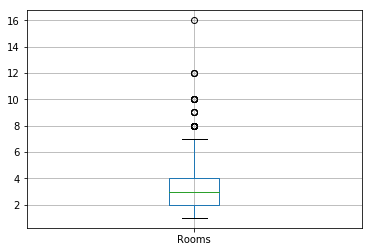

In [113]:
df[['Rooms']].boxplot()

In [114]:
q3 = df[['Rooms']].quantile(0.75).Rooms
q1 = df[['Rooms']].quantile(0.25).Rooms
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t

In [115]:
outliers_above

6.0

In [116]:
outliers_below

0.0

In [117]:
df.loc[df.Rooms>6].count().Rooms

65

### Drop outliers

We can drop the outliers since it is only 65 records out of 34856 records

In [118]:
df_drop = df.copy(deep = True)
df_drop.loc[~ (df_drop['Rooms']>6)].head(5)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,2016-03-09,2.5,3067,2,...,126.0,NaN,NaN,Yarra City Council,-37.8014,144.996,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,2016-03-09,13.5,3042,3,...,303.0,225.0,2016,Moonee Valley City Council,-37.718,144.878,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,2016-03-09,3.3,3206,2,...,120.0,82.0,1900,Port Phillip City Council,-37.8459,144.956,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,2016-03-09,3.3,3206,2,...,159.0,NaN,NaN,Port Phillip City Council,-37.845,144.954,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,2016-03-09,6.4,3078,3,...,174.0,122.0,2003,Darebin City Council,-37.7818,145.02,Northern Metropolitan,2211.0,Parkade,NaN


### Replace with Max

In [119]:
df_max = df.copy(deep = True)
df_max.loc[df_max.Rooms>6, 'Rooms'] = 6

In [120]:
df_max.loc[df_max.Rooms>6].count().Rooms

0

### Replace with Median

In [121]:
df_median = df.copy(deep = True)
median = df_median.loc[df_median.Rooms<=6, 'Rooms'].median()
median

3.0

In [122]:
df_median.loc[df_median.Rooms>6, 'Rooms'] = median

In [123]:
df_median.loc[df_median.Rooms>6].count().Rooms

0

### Replace with Mean

In [124]:
df_mean = df.copy(deep = True)
mean = df_mean.loc[df_mean.Rooms<=6, 'Rooms'].mean()
mean = np.round(mean)

In [125]:
df_mean.loc[df_mean.Rooms>6, 'Rooms'] = mean

In [126]:
df_mean.loc[df_mean.Rooms>6].count().Rooms

0

<html>
<font color = Blue size = 4>
<b>Visualizations
</b>
</font>
</html>

In [127]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.dropna(inplace =  True)
df_num.head()

,Rooms,Distance,Landsize,BuildingArea,Propertycount,Price
1,3,13.5,303.0,225.0,3464.0,840000.0
2,2,3.3,120.0,82.0,3280.0,1275000.0
5,4,6.4,853.0,263.0,2211.0,2000000.0
7,3,13.8,352.0,242.0,5301.0,520000.0
9,5,11.1,592.0,251.0,5132.0,1085000.0


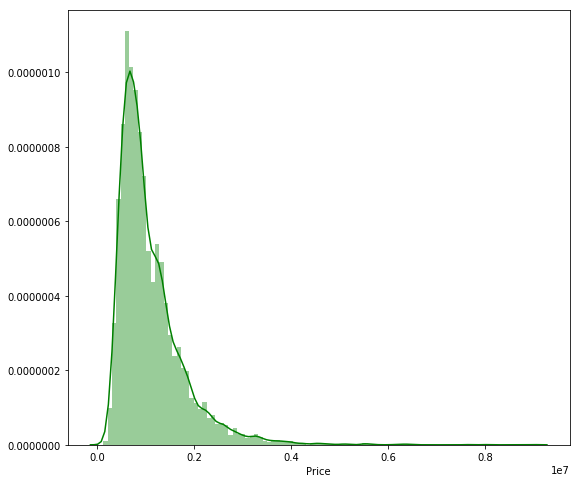

In [128]:
plt.figure(figsize=(9, 8))
sns.distplot(df_num['Price'],color='g', bins=100)

### Plot Numerical features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001E5ABBE0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E773320>]], dtype=object)

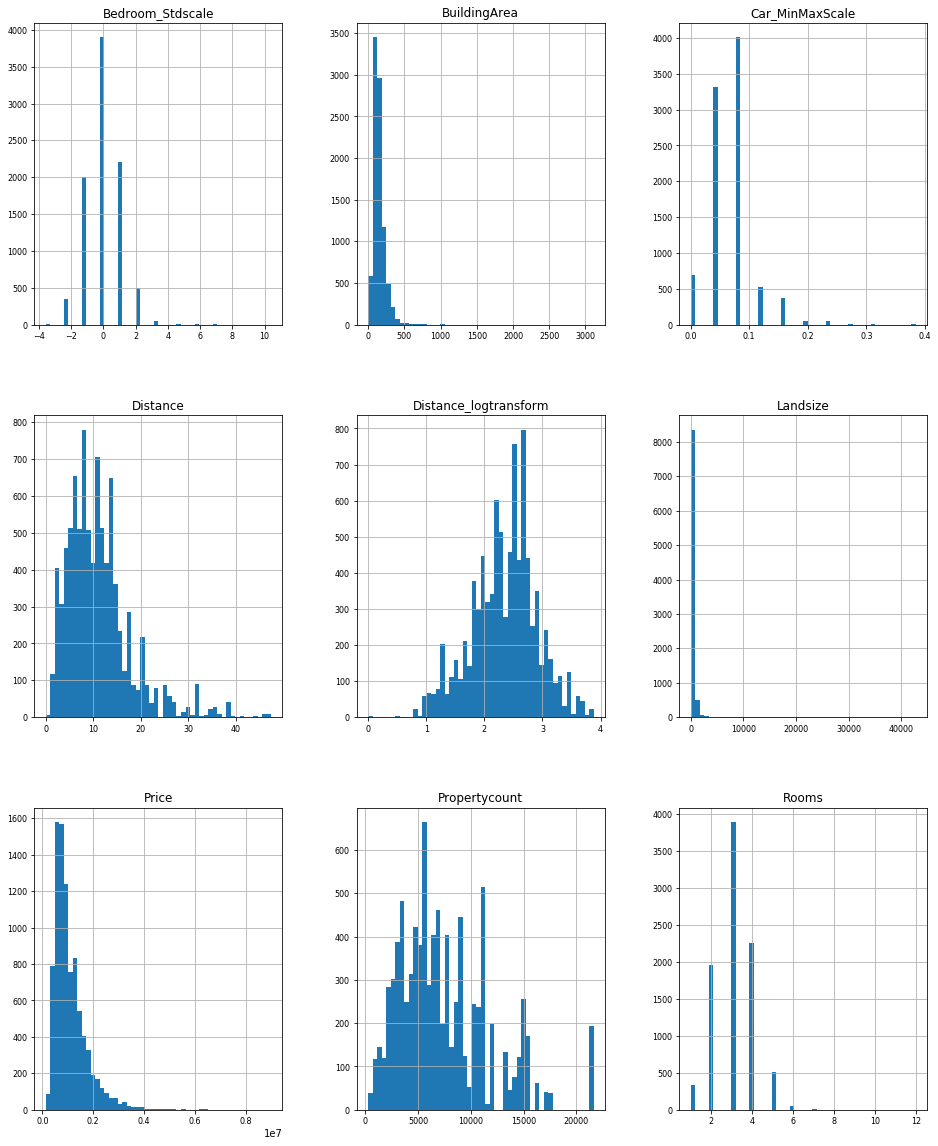

In [69]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

### Correlation plot

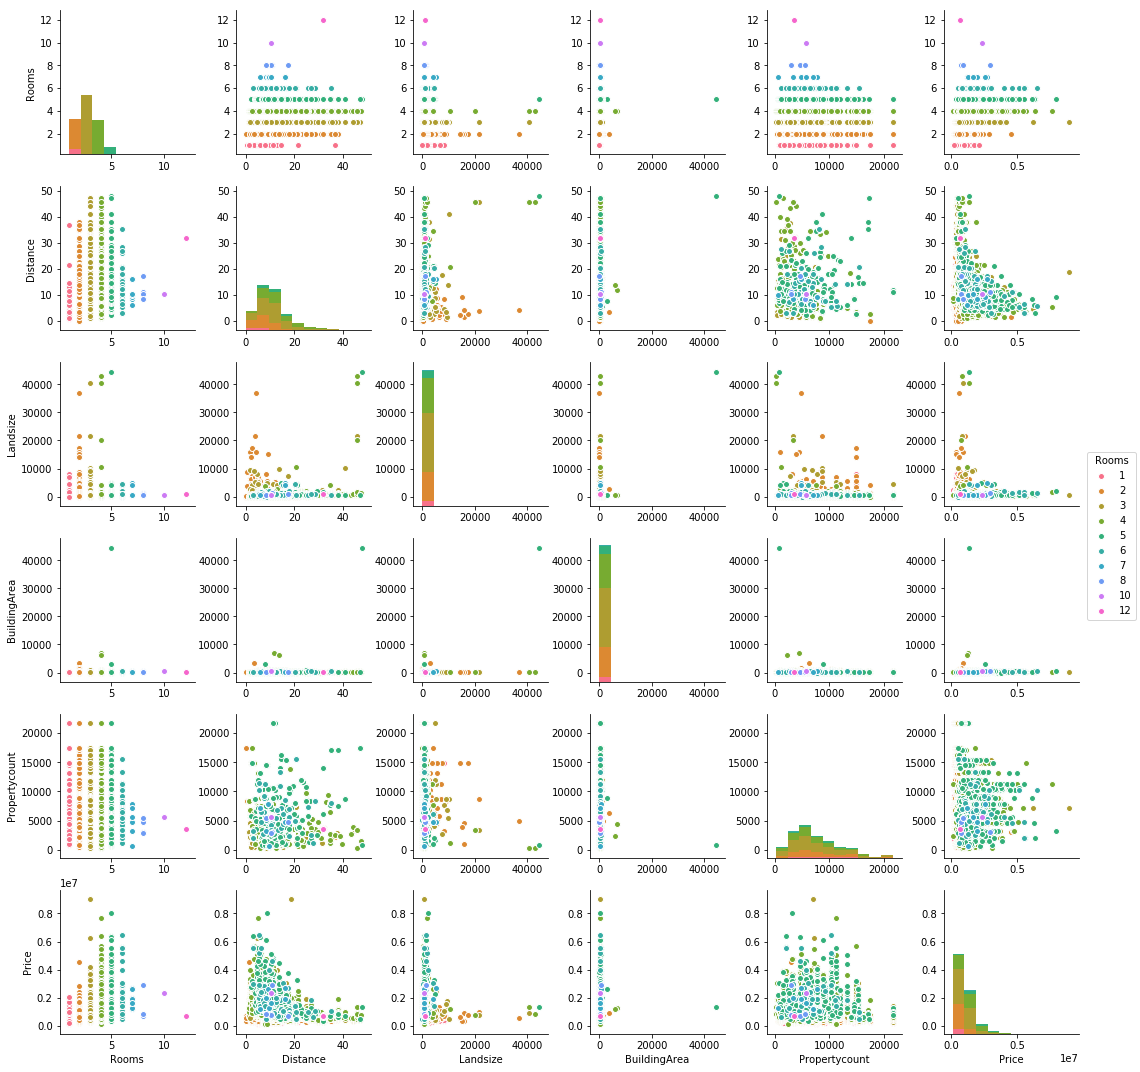

In [131]:
sns.pairplot(df_num,hue="Rooms",palette="husl")

In [134]:
cor = df_num.corr()
cor

,Rooms,Distance,Landsize,BuildingArea,Propertycount,Price
Rooms,1.000000,0.281415,0.096851,0.132228,-0.078200,0.469706
Distance,0.281415,1.000000,0.156979,0.080916,-0.003456,-0.234534
Landsize,0.096851,0.156979,1.000000,0.375341,-0.039415,0.051820
BuildingArea,0.132228,0.080916,0.375341,1.000000,-0.027722,0.096032
Propertycount,-0.078200,-0.003456,-0.039415,-0.027722,1.000000,-0.060352
Price,0.469706,-0.234534,0.051820,0.096032,-0.060352,1.000000


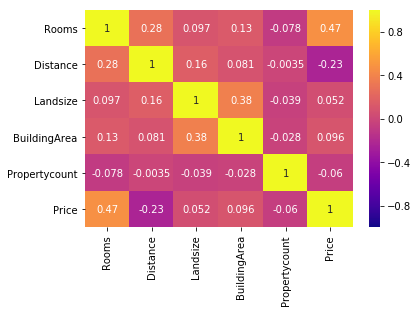

In [135]:
sns.heatmap(cor,annot=True,cmap='plasma',vmin=-1,vmax=1)

### ---Try to apply the above analysis for different datasets--- 